# Calculating the Correlations Between User Interaction Metrics and Viewing Data

Important Note: Please do not conflate correlation with causation. For the variables below, the correlations between them does not necessarily mean that changes in one of them **_causes_** changes in the other, just that they are related.

For reference, the correlation co-efficient, usually denoted by _r_ takes a value between -1 and 1. To interpret its value, the following boundaries are often used:

-1:                    Perfect Negative Linear Relationship
<br>
Between -0.7 and -1 :  Strong Negative Linear Relationship
<br>
Between -0.5 and -0.7: Moderate Negative Linear Relationship
<br>
Between -0.3 and -0.5: Weak Negative Linear Relationship
<br>
Between 0.3 and -0.3:  No Linear Relationship
<br>
Between 0.3 and 0.5:   Weak Positive Linear Relationship
<br>
Between 0.5 and 0.7:   Moderate Positive Linear Relationship
<br>
Between 0.7 and 1:     Strong Positive Linear Relationship
<br>
1:                     Perfect Positive Linear Relationship

# Import the Necassary Packages & Look at the Data Frame

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nps = pd.read_csv('NPS Correlation.csv')
nps.head()

,Month,NPS Score,Awareness,Consideration,Usage,Satisfaction,Problems,For Me,Range,Discover,Talking About,Easy,Available,Appealing,Consumption,MAUs,Average Consumption,Light Users
0,Mar-16,0,67,57,26,53,17,67,69,49,42,71,68,65,18771584.11,3080744,6.093198,75.99
1,Apr-16,7,69,59,26,62,18,68,66,48,38,68,65,59,18545230.01,2999218,6.183355,76.61
2,May-16,3,73,58,29,61,15,70,62,47,37,69,68,57,19221901.53,3286215,5.849253,76.85
3,Jun-16,-5,77,62,31,54,18,66,67,41,41,67,65,57,30995598.41,4647962,6.668643,70.28
4,Jul-16,-9,76,63,30,57,15,67,60,46,33,67,63,54,24513052.09,3654418,6.707786,72.00


I have combined the data that Ally sent me with the last four columns; taken from SVV and our BI Final Figures Sheet. (this will be for O&O platforms only)

Column Definitions:

For Me: ITV Hub has something I’d like to watch / something for me 
<br>
Range: ITV Hub has a good range of programmes available
<br>
Discover: ITV Hub is a destination to discover something to watch
<br>
Talking About: ITV Hub has programmes everyone is talking about
<br>
Easy: ITV Hub is easy to use
<br>
Available: ITV Hub is available whenever and wherever I want
<br>
Appealing: ITV Hub looks appealing

# Reset the Index of the Data Frame to the Month

In [3]:
nps = nps.set_index('Month')
nps.head()

,NPS Score,Awareness,Consideration,Usage,Satisfaction,Problems,For Me,Range,Discover,Talking About,Easy,Available,Appealing,Consumption,MAUs,Average Consumption,Light Users
Month,,,,,,,,,,,,,,,,,
Mar-16,0,67,57,26,53,17,67,69,49,42,71,68,65,18771584.11,3080744,6.093198,75.99
Apr-16,7,69,59,26,62,18,68,66,48,38,68,65,59,18545230.01,2999218,6.183355,76.61
May-16,3,73,58,29,61,15,70,62,47,37,69,68,57,19221901.53,3286215,5.849253,76.85
Jun-16,-5,77,62,31,54,18,66,67,41,41,67,65,57,30995598.41,4647962,6.668643,70.28
Jul-16,-9,76,63,30,57,15,67,60,46,33,67,63,54,24513052.09,3654418,6.707786,72.00


# Calculate the Correlation Matrix of the Data Frame

In [4]:
nps.corr()

,NPS Score,Awareness,Consideration,Usage,Satisfaction,Problems,For Me,Range,Discover,Talking About,Easy,Available,Appealing,Consumption,MAUs,Average Consumption,Light Users
NPS Score,1.000000,0.143615,0.032148,0.186300,0.283140,-0.180575,0.476587,0.681634,0.619541,0.371443,0.464228,0.568640,0.300819,-0.222010,-0.108556,-0.194696,0.156813
Awareness,0.143615,1.000000,0.942674,0.902963,0.882388,-0.127575,-0.008958,0.152322,-0.113114,-0.079186,0.155464,0.211551,-0.288266,-0.214173,-0.210575,-0.001261,0.136469
Consideration,0.032148,0.942674,1.000000,0.801482,0.886486,-0.126818,-0.145801,0.116468,-0.179336,-0.199758,0.033500,0.102159,-0.238020,-0.313295,-0.317006,-0.007991,0.246849
Usage,0.186300,0.902963,0.801482,1.000000,0.692264,-0.300119,0.131015,0.197912,-0.112192,0.190503,0.266627,0.347628,-0.310041,0.125666,0.150327,-0.000212,-0.178386
Satisfaction,0.283140,0.882388,0.886486,0.692264,1.000000,-0.061636,-0.039940,0.213366,0.081897,-0.228866,0.074152,0.163107,-0.147198,-0.486165,-0.473389,-0.044014,0.363149
Problems,-0.180575,-0.127575,-0.126818,-0.300119,-0.061636,1.000000,-0.495503,-0.339880,-0.239211,-0.407704,-0.493390,-0.473582,-0.192360,-0.155559,-0.312939,0.387011,0.118695
For Me,0.476587,-0.008958,-0.145801,0.131015,-0.039940,-0.495503,1.000000,0.679731,0.648098,0.631224,0.838247,0.794774,0.439008,0.140516,0.320076,-0.429349,-0.214473
Range,0.681634,0.152322,0.116468,0.197912,0.213366,-0.339880,0.679731,1.000000,0.748568,0.633909,0.749689,0.819319,0.641078,-0.121138,0.043760,-0.380289,0.045643
Discover,0.619541,-0.113114,-0.179336,-0.112192,0.081897,-0.239211,0.648098,0.748568,1.000000,0.500928,0.579976,0.648621,0.646836,-0.185911,0.006004,-0.478001,0.077145
Talking About,0.371443,-0.079186,-0.199758,0.190503,-0.228866,-0.407704,0.631224,0.633909,0.500928,1.000000,0.618924,0.686455,0.549842,0.505189,0.639006,-0.303571,-0.444315


The NPS Score does not correlate strongly with any of the viewing metrics, with scores of (-0.22, -0.11, -0.19 & 0.16) for Consumption, MAUs, Avg. Consumption and Light Users % respectively.

The strongest correlations in the above data are between (in ranked order):

Talking About - MAUs: 0.64
<br>
Talking About - Consumption: 0.51
<br>
Satisfaction - MAUs: -0.49
<br>
Discover - Avg. Consumption: -0.48
<br>
Satisfaction - Consumption: -0.47
<br>
Talking About - Light Users: -0.44
<br>
For Me - Avg. Consumption: -0.43
<br>
Appealing - Avg. Consumption: -0.43
<br>
Easy - Avg. Consumption: -0.39
<br>
Range - Avg. Consumption: -0.38
<br>
Satisfaction - Light Users: 0.36
<br>
Problems - Avg. Consumption: 0.36
<br>
Available - Avg. Consumptoion: -0.35
<br>
Talking About - Avg. Consumption: -0.3

From these results, the best metrics to use would be: Talking About and Satisfaction but again none of these correlations are particularly strong.

# Create the Scatter Matrix of the Scatter Plots Between Each Variable in the Data Frame

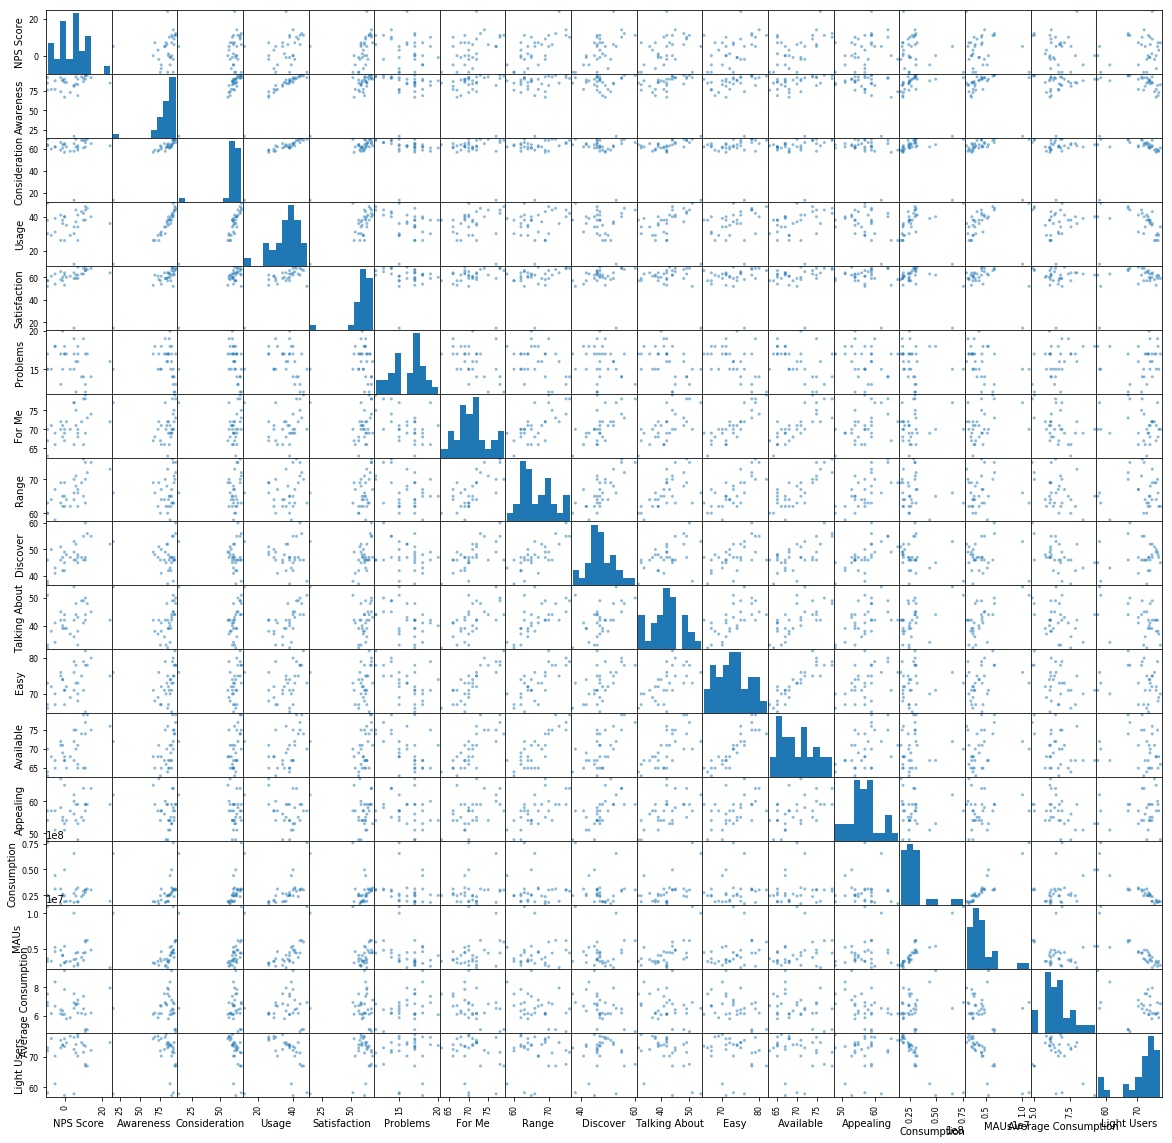

In [5]:
pd.plotting.scatter_matrix(nps, figsize=(20, 20))
plt.show()

The above matrix shows the scatter plots of each variable with each other variable in the above data frame. It gives a visual representation of the correlation matrix so that you can see the realtionships rather than just being presented with a number.

You will be able to see the relationships between the most highly correlated variables from the cell above in their indvidual scatter plots.

# Create a Function to Generate a Heatmap of the Correlations Between Each Variable in the Data Frame

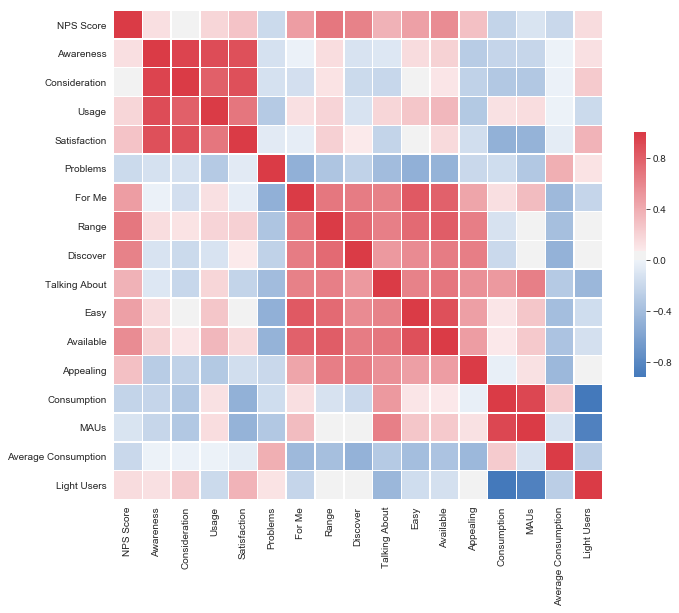

In [6]:
def CorrMtx(df, dropDuplicates = True):
   
    df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, square=True, linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, square=True, linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

CorrMtx(nps, dropDuplicates = False)

#code from https://stackoverflow.com/questions/39409866/correlation-heatmap

Again, the above is a visual representation of the correlation matrix using a heatmap rather than the raw figures. This might help to give you a coarser view of the relationships. As you can see, there is not much deep red or deep blue in the squares representing the relationships between the user metrics and viewing data; meaning that the correlations between these variables are not particularly strong.

The focus here are the squares in the bottom-left / top-right comparing the possible user metrics to the viewing data.

In [13]:
nps_updated = pd.read_csv('NPS Correlation Updated.csv')
nps_updated.set_index('Month')
nps_updated.head()

,Month,NPS Score,NPS Average,Awareness,Consideration,Usage,Satisfaction,Satisfaction Net,Problems,For Me,...,Talking About,Talking Net,Easy,Available,Appealing,Heard Net,Consumption,MAUs,Average Consumption,Light Users
0,Mar-16,0,7.01,67,57,26,53,0.14,17,67,...,42,-0.48,71,68,65,-0.65,18771584.11,3080744,6.093198,75.99
1,Apr-16,7,6.89,69,59,26,62,0.21,18,68,...,38,-0.30,68,65,59,-0.71,18545230.01,2999218,6.183355,76.61
2,May-16,3,7.03,73,58,29,61,0.13,15,70,...,37,-0.35,69,68,57,-0.65,19221901.53,3286215,5.849253,76.85
3,Jun-16,-5,6.64,77,62,31,54,0.11,18,66,...,41,-0.42,67,65,57,-0.69,30995598.41,4647962,6.668643,70.28
4,Jul-16,-9,6.55,76,63,30,57,0.10,15,67,...,33,-0.28,67,63,54,-0.66,24513052.09,3654418,6.707786,72.00


In [14]:
nps_updated.corr()

,NPS Score,NPS Average,Awareness,Consideration,Usage,Satisfaction,Satisfaction Net,Problems,For Me,Range,...,Talking About,Talking Net,Easy,Available,Appealing,Heard Net,Consumption,MAUs,Average Consumption,Light Users
NPS Score,1.000000,0.801967,0.143615,0.032148,0.186300,0.283140,0.600706,-0.180575,0.476587,0.681634,...,0.371443,-0.150387,0.464228,0.568640,0.300819,-0.001611,-0.222010,-0.108556,-0.194696,0.156813
NPS Average,0.801967,1.000000,-0.011127,-0.075519,0.052945,0.114546,0.375084,-0.088618,0.327600,0.512885,...,0.229216,-0.317131,0.326734,0.469272,0.208382,0.021029,-0.175868,-0.155957,0.064305,0.142730
Awareness,0.143615,-0.011127,1.000000,0.942674,0.902963,0.882388,0.007976,-0.127575,-0.008958,0.152322,...,-0.079186,-0.097493,0.155464,0.211551,-0.288266,0.203117,-0.214173,-0.210575,-0.001261,0.136469
Consideration,0.032148,-0.075519,0.942674,1.000000,0.801482,0.886486,-0.077855,-0.126818,-0.145801,0.116468,...,-0.199758,0.097723,0.033500,0.102159,-0.238020,-0.023808,-0.313295,-0.317006,-0.007991,0.246849
Usage,0.186300,0.052945,0.902963,0.801482,1.000000,0.692264,0.003893,-0.300119,0.131015,0.197912,...,0.190503,-0.159375,0.266627,0.347628,-0.310041,0.190372,0.125666,0.150327,-0.000212,-0.178386
Satisfaction,0.283140,0.114546,0.882388,0.886486,0.692264,1.000000,0.205615,-0.061636,-0.039940,0.213366,...,-0.228866,0.068623,0.074152,0.163107,-0.147198,0.138775,-0.486165,-0.473389,-0.044014,0.363149
Satisfaction Net,0.600706,0.375084,0.007976,-0.077855,0.003893,0.205615,1.000000,-0.160965,0.284683,0.406490,...,0.216826,-0.079890,0.231422,0.352488,0.398224,0.173362,-0.060148,-0.054213,0.007946,0.041824
Problems,-0.180575,-0.088618,-0.127575,-0.126818,-0.300119,-0.061636,-0.160965,1.000000,-0.495503,-0.339880,...,-0.407704,-0.204631,-0.493390,-0.473582,-0.192360,-0.418275,-0.155559,-0.312939,0.387011,0.118695
For Me,0.476587,0.327600,-0.008958,-0.145801,0.131015,-0.039940,0.284683,-0.495503,1.000000,0.679731,...,0.631224,-0.033339,0.838247,0.794774,0.439008,0.226706,0.140516,0.320076,-0.429349,-0.214473
Range,0.681634,0.512885,0.152322,0.116468,0.197912,0.213366,0.406490,-0.339880,0.679731,1.000000,...,0.633909,-0.040890,0.749689,0.819319,0.641078,-0.139090,-0.121138,0.043760,-0.380289,0.045643


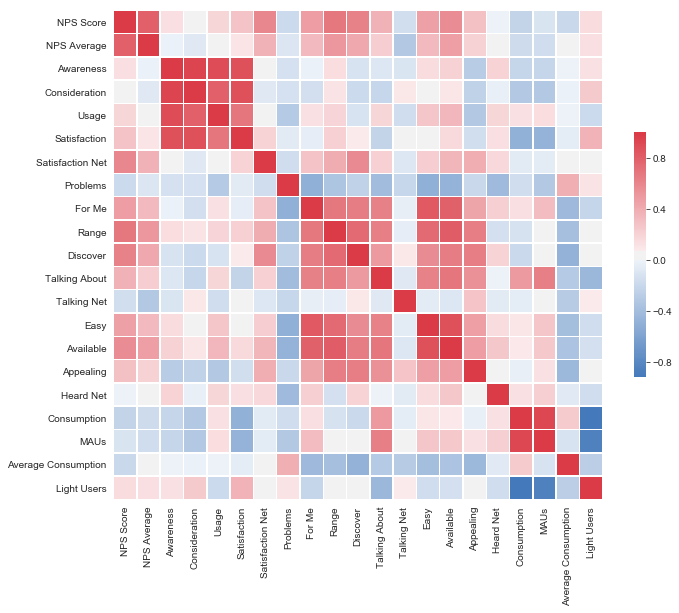

In [15]:
CorrMtx(nps_updated, dropDuplicates = False)

The addition of the new columns (Average NPS Score, Satisfaction Net, Talking Net and Heard Net) does not offer any additional information as none of them are correlated with the four viewing measures.

# Use the Extra Trees Classifier to Calculate the Importance of Each Variable to the Satisfaction Score

In [21]:
nps_satisfaction = nps_updated.loc[:,['Month','Satisfaction','Consumption','MAUs','Average Consumption','Light Users']]
nps_satisfaction = nps_satisfaction.set_index('Month')
nps_satisfaction.head()

,Satisfaction,Consumption,MAUs,Average Consumption,Light Users
Month,,,,,
Mar-16,53,18771584.11,3080744,6.093198,75.99
Apr-16,62,18545230.01,2999218,6.183355,76.61
May-16,61,19221901.53,3286215,5.849253,76.85
Jun-16,54,30995598.41,4647962,6.668643,70.28
Jul-16,57,24513052.09,3654418,6.707786,72.00


In [22]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(nps_satisfaction[['Consumption','MAUs','Average Consumption','Light Users']], nps_satisfaction['Satisfaction'])

print(model.feature_importances_)

[0.23769834 0.25601092 0.25561251 0.25067824]


# Use the Extra Trees Classifier to Calculate the Importance of Each Variable to the Talking About Statement

In [23]:
nps_talking = nps_updated.loc[:,['Month','Talking About','Consumption','MAUs','Average Consumption','Light Users']]
nps_talking = nps_talking.set_index('Month')
nps_talking.head()

,Talking About,Consumption,MAUs,Average Consumption,Light Users
Month,,,,,
Mar-16,42,18771584.11,3080744,6.093198,75.99
Apr-16,38,18545230.01,2999218,6.183355,76.61
May-16,37,19221901.53,3286215,5.849253,76.85
Jun-16,41,30995598.41,4647962,6.668643,70.28
Jul-16,33,24513052.09,3654418,6.707786,72.00


In [24]:
model2 = ExtraTreesClassifier()
model2.fit(nps_talking[['Consumption','MAUs','Average Consumption','Light Users']], nps_talking['Talking About'])

print(model2.feature_importances_)

[0.22847832 0.25999066 0.23046588 0.28106514]


# Do This the Other Way Around to Get Each Metrics Importance to Each Viewing Measure

In [26]:
model_c = ExtraTreesClassifier()
model_c.fit(nps_updated[['Talking About','Satisfaction','Consideration','NPS Score','Awareness','Usage','Problems','For Me',
                        'Range','Discover','Available','Appealing','Easy']], nps_updated['MAUs'])

print(model_c.feature_importances_)

[0.09032258 0.11290323 0.1        0.06129032 0.09354839 0.08387097
 0.08064516 0.09677419 0.04193548 0.0483871  0.06451613 0.07096774
 0.05483871]


In [31]:
nps_updated['Light Users'] = round(nps_updated['Light Users'], 0)

model_c = ExtraTreesClassifier()
model_c.fit(nps_updated[['Talking About','Satisfaction','Consideration','NPS Score','Awareness','Usage','Problems','For Me',
                        'Range','Discover','Available','Appealing','Easy']], nps_updated['Light Users'])

print(model_c.feature_importances_)

[0.06129032 0.06774194 0.05806452 0.11290323 0.07419355 0.09677419
 0.06774194 0.05806452 0.06129032 0.08709677 0.07419355 0.08064516
 0.1       ]


In [32]:
nps_updated['Consumption'] = round(nps_updated['Consumption'], 0)

model_c = ExtraTreesClassifier()
model_c.fit(nps_updated[['Talking About','Satisfaction','Consideration','NPS Score','Awareness','Usage','Problems','For Me',
                        'Range','Discover','Available','Appealing','Easy']], nps_updated['Consumption'])

print(model_c.feature_importances_)

[0.07096774 0.07419355 0.06451613 0.09032258 0.09032258 0.07419355
 0.09354839 0.07741935 0.07419355 0.07419355 0.06451613 0.1
 0.0516129 ]


In [33]:
nps_updated['Average Consumption'] = round(nps_updated['Average Consumption'], 0)

model_c = ExtraTreesClassifier()
model_c.fit(nps_updated[['Talking About','Satisfaction','Consideration','NPS Score','Awareness','Usage','Problems','For Me',
                        'Range','Discover','Available','Appealing','Easy']], nps_updated['Average Consumption'])

print(model_c.feature_importances_)

[0.07303987 0.08267863 0.10108278 0.03675371 0.11044454 0.09606847
 0.04334162 0.06249961 0.0885269  0.08143484 0.07039773 0.07994591
 0.07378539]
